In [1]:
import pandas as pd
import csv




df = pd.read_csv("UberDataset.csv", dtype=str)




In [2]:
df = df[~df['START_DATE'].str.contains("Total", na=False)]


In [3]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')


In [4]:


df['START_DATE'].dtype


dtype('<M8[ns]')

In [5]:
df['END_DATE'].dtype


dtype('<M8[ns]')

In [6]:
df['hour'] = df['START_DATE'].dt.hour
df['weekday'] = df['START_DATE'].dt.day_name()
df['month'] = df['START_DATE'].dt.month_name()
df['date'] = df['START_DATE'].dt.date



In [7]:
df[['START_DATE', 'hour', 'weekday', 'month']].head()


,START_DATE,hour,weekday,month
0,2016-01-01 21:11:00,21.0,Friday,January
1,2016-01-02 01:25:00,1.0,Saturday,January
2,2016-01-02 20:25:00,20.0,Saturday,January
3,2016-01-05 17:31:00,17.0,Tuesday,January
4,2016-01-06 14:42:00,14.0,Wednesday,January


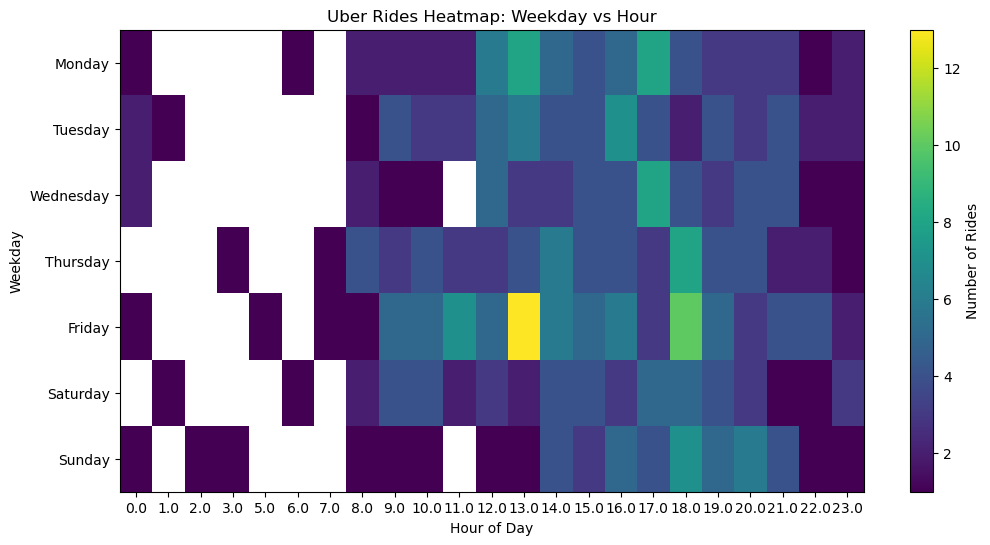

In [11]:
import matplotlib.pyplot as plt
import numpy as np
pivot = df.pivot_table(
    index='weekday',
    columns='hour',
    values='START_DATE',
    aggfunc='count'
)

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot = pivot.reindex(weekday_order)

plt.figure(figsize=(12, 6))
plt.imshow(pivot, aspect='auto')
plt.colorbar(label='Number of Rides')

plt.xticks(np.arange(len(pivot.columns)), pivot.columns)
plt.yticks(np.arange(len(pivot.index)), pivot.index)

plt.title("Uber Rides Heatmap: Weekday vs Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")

plt.show()

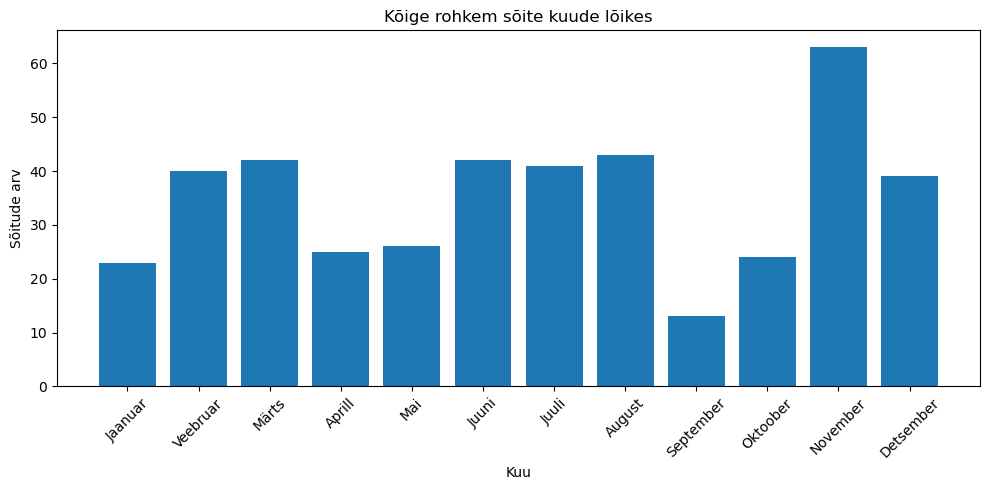

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("UberDataset.csv")

date_col = None
for col in df.columns:
    if "date" in col.lower() or "time" in col.lower() or "datetime" in col.lower():
        date_col = col
        break

if date_col is None:
    raise ValueError("Dataset ei sisalda kuupäeva või aja veergu!")

df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

kuud = {
    1: "Jaanuar", 2: "Veebruar", 3: "Märts", 4: "Aprill",
    5: "Mai", 6: "Juuni", 7: "Juuli", 8: "August",
    9: "September", 10: "Oktoober", 11: "November", 12: "Detsember"
}

df["Month"] = df[date_col].dt.month
df["Kuu_nimi"] = df["Month"].map(kuud)

month_counts = df["Kuu_nimi"].value_counts().reindex(kuud.values(), fill_value=0)

plt.figure(figsize=(10, 5))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel("Kuu")
plt.ylabel("Sõitude arv")
plt.title("Kõige rohkem sõite kuude lõikes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
